## DATA FEATURES

- TIMESTAMP: Date when survey was completed

- FRUITS_VEGGIES: How many fruits or vegetable do you eat everyday?

- DAILY_STRESS: How much stress do you typically experience everyday?

- PLACES_VISITED: How many new places do you visit?

- CORE_CIRCLE: How many people are very close to you?

- SUPPORTING_OTHERS: How many people do you help achieve a better life?

- SOCIAL_NETWORK: With how many people do you interact with during a typical day?

- ACHIEVEMENT: How many remarkable achievements are you proud of?

- DONATION: How many times do you donate your time or money to good causes?

- BMI_RANGE: What is your body mass index (BMI) range?

- TODO_COMPLETED: How well do you complete your weekly to-do lists?

- FLOW: In a typical day, how many hours do you experience "FLOW"?

- DAILY_STEPS: How many steps (in thousands) do you typically walk everyday?

- LIVE_VISION: For how may years ahead is your life vision very clear for?

- SLEEP_HOURS: About how long do you typically sleep?

- LOST_VACATION: How many days of vacation do you typically lose every year?

- DAILY_SHOUTING: How often do you shout or sulk at somebody?

- SUFFICIENT_INCREASE: How sufficient is your increase to cover basic life expenses?

- PERSONAL_AWARDS: How many recognitions have you received in your life?

- TIME_FOR_PASSION: How many hours do you spend everyday doing what you are passionate about?

- WEEKLY_MEDITATION: In a typical week, how many times do you have the opportunity to think about yourself?

- AGE: Age groups

- GENDER: Male or Female

- WORK_LIFE_BALANCE: Score calculated by AH.COM algorithm and reported to user in the first report.

## IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np # linear algebra
from mpl_toolkits import mplot3d # used in 3D plotting
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization

import seaborn as sns # data visualization
%matplotlib inline

## DATA PREPROCESSING

In [2]:


df = _deepnote_execute_sql("""SELECT *
FROM 'Wellbeing_and_lifestyle_data_Kaggle-20230317-080029.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [4]:
df.drop(["Timestamp", "AGE"], axis = 1, inplace = True)

In [5]:
df = df.replace(r'^\s*$', np.nan, regex=True) #to replace all empty spaces with NaN

In [6]:
df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,0,7,5,5,1,4,0,5,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,...,5,8,2,2,2,3,2,6,Female,655.6
2,2,3,3,4,4,10,3,2,2,2,...,5,8,10,2,2,4,8,3,Female,631.6
3,3,3,10,3,10,7,2,5,2,3,...,0,5,7,5,1,5,2,0,Female,622.7
4,5,1,3,3,10,4,2,4,2,5,...,0,7,0,0,2,8,1,5,Female,663.9


In [7]:
import warnings
warnings.filterwarnings('ignore')

## DATA VISUALIZATION

### LINE CHART

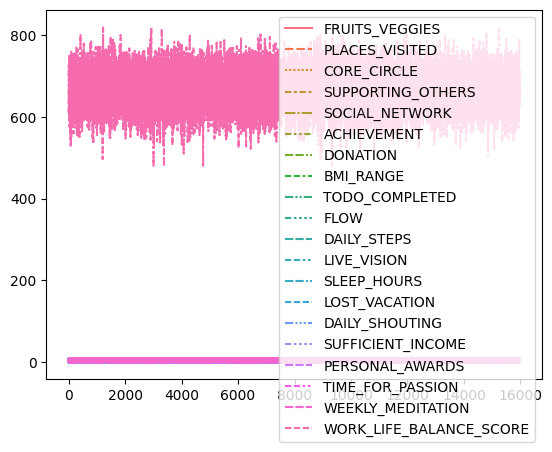

In [8]:
sns.lineplot(data=df)
plt.show()

### BAR CHART

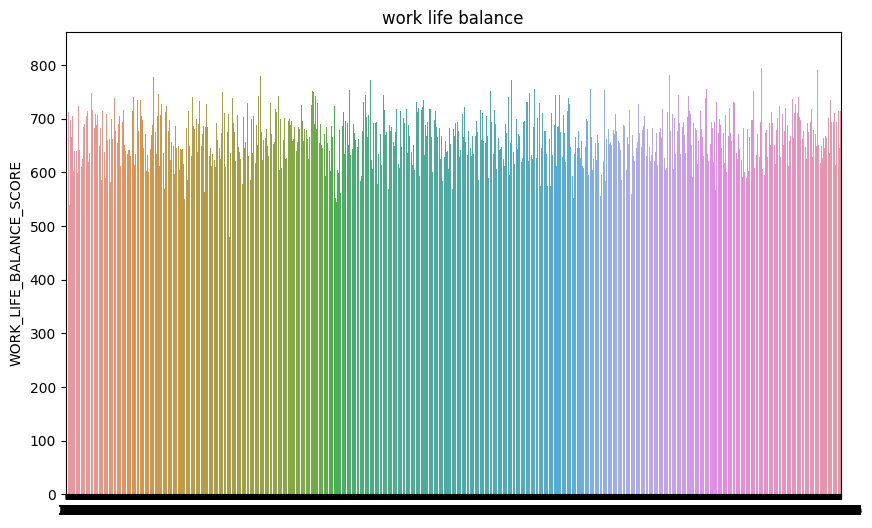

In [9]:
plt.figure(figsize=(10,6))

plt.title("work life balance")

sns.barplot(x=df.index, y=df['WORK_LIFE_BALANCE_SCORE'])


plt.show()

### HISTOGRAMS

<AxesSubplot: xlabel='FRUITS_VEGGIES', ylabel='Count'>

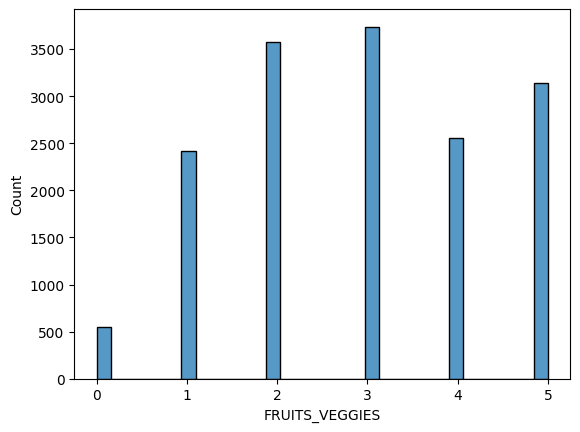

In [10]:
sns.histplot(df["FRUITS_VEGGIES"])

<AxesSubplot: xlabel='DAILY_STRESS', ylabel='Count'>

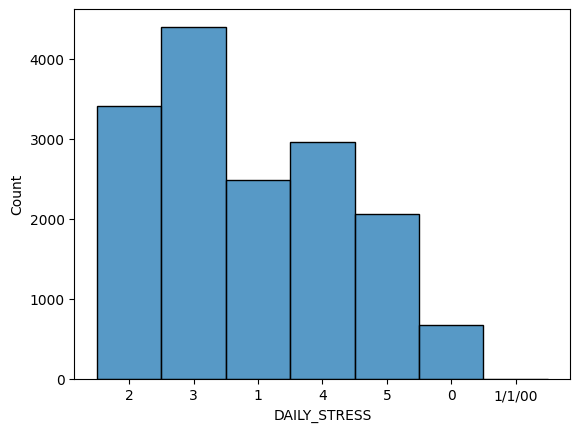

In [11]:
sns.histplot(df['DAILY_STRESS'])

<AxesSubplot: xlabel='PLACES_VISITED', ylabel='Count'>

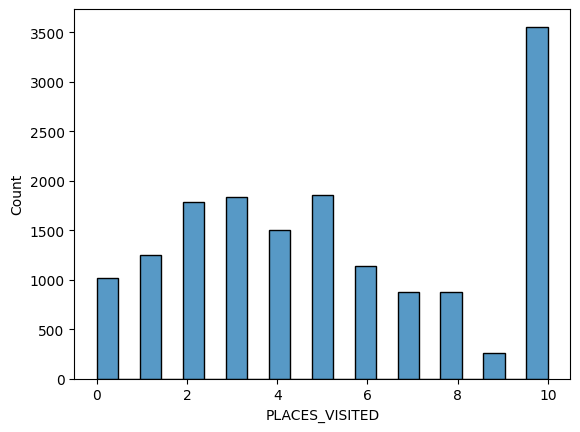

In [12]:
sns.histplot(df['PLACES_VISITED'])

<AxesSubplot: xlabel='CORE_CIRCLE', ylabel='Count'>

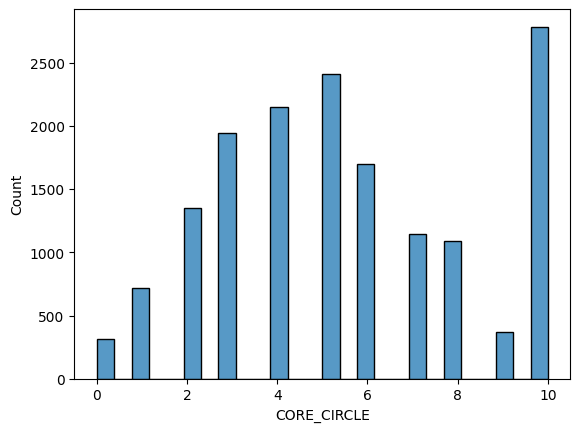

In [13]:
sns.histplot(df['CORE_CIRCLE'])

<AxesSubplot: xlabel='SUPPORTING_OTHERS', ylabel='Count'>

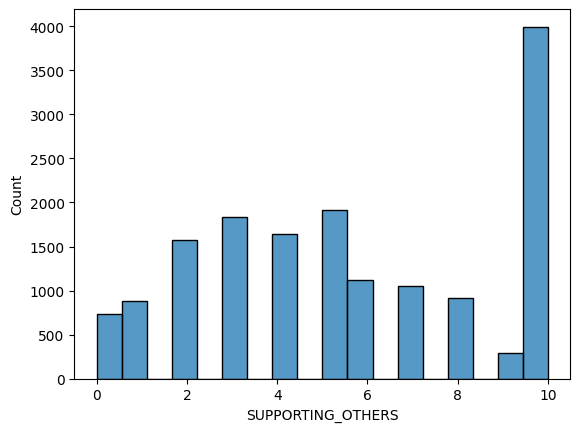

In [14]:
sns.histplot(df['SUPPORTING_OTHERS'])

<AxesSubplot: xlabel='SOCIAL_NETWORK', ylabel='Count'>

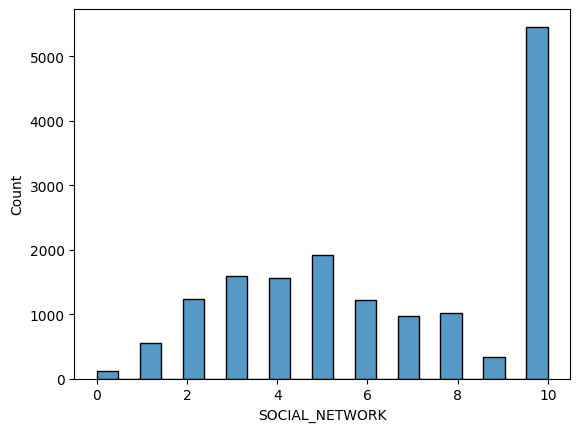

In [15]:
sns.histplot(df['SOCIAL_NETWORK'])

In [16]:
sns.histplot(df['ACHIEVEMENT'])

<AxesSubplot: xlabel='ACHIEVEMENT', ylabel='Count'>

<AxesSubplot: xlabel='DONATION', ylabel='Count'>

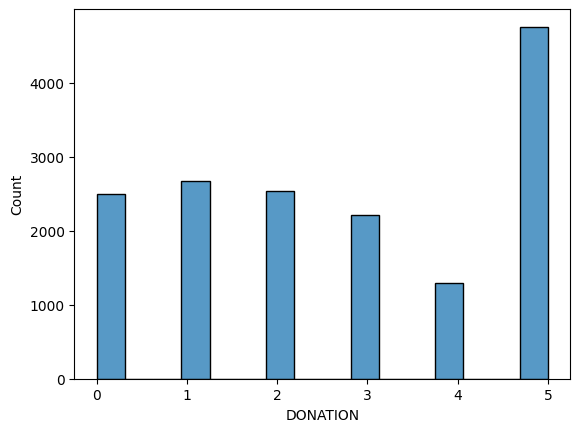

In [17]:
sns.histplot(df['DONATION'])

<AxesSubplot: xlabel='BMI_RANGE', ylabel='Count'>

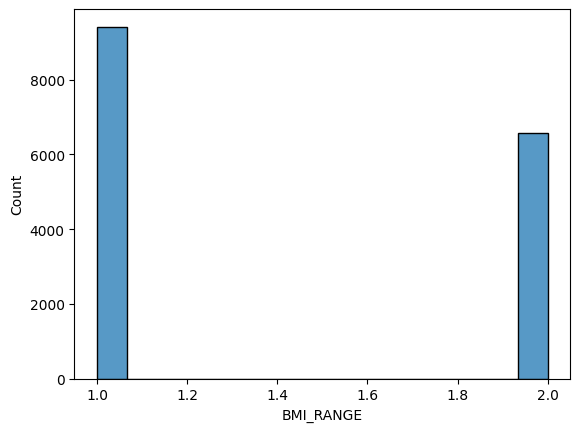

In [18]:
sns.histplot(df['BMI_RANGE'])


<AxesSubplot: xlabel='TODO_COMPLETED', ylabel='Count'>

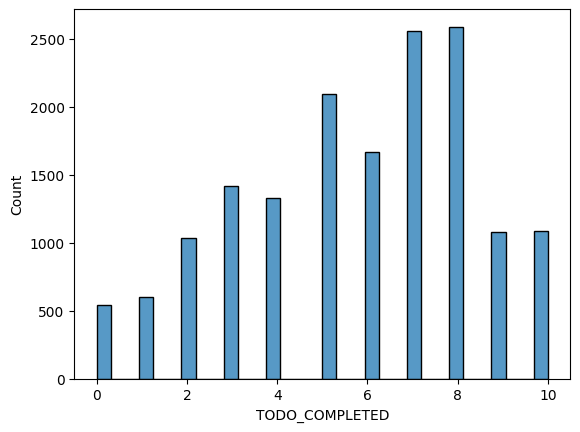

In [19]:
sns.histplot(df['TODO_COMPLETED'])

<AxesSubplot: xlabel='FLOW', ylabel='Count'>

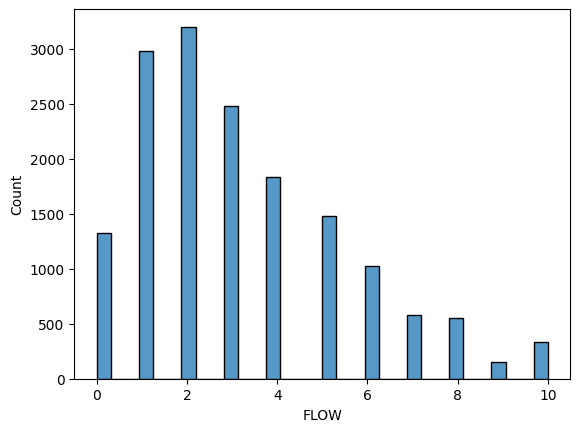

In [20]:
sns.histplot(df['FLOW'])

<AxesSubplot: xlabel='DAILY_STEPS', ylabel='Count'>

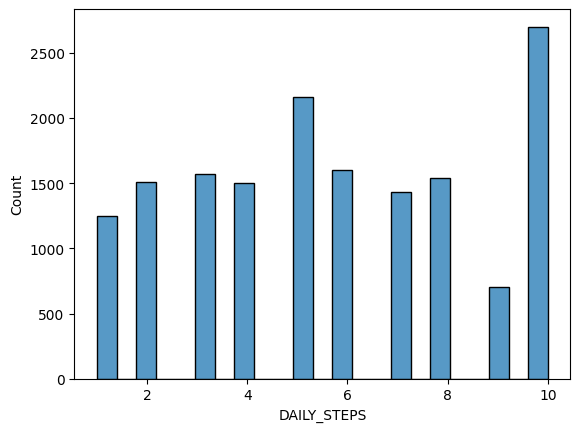

In [21]:
sns.histplot(df['DAILY_STEPS'])

<AxesSubplot: xlabel='LIVE_VISION', ylabel='Count'>

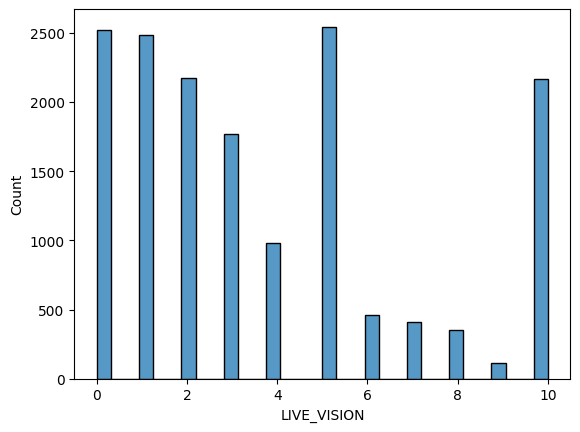

In [22]:
sns.histplot(df['LIVE_VISION'])

<AxesSubplot: xlabel='SLEEP_HOURS', ylabel='Count'>

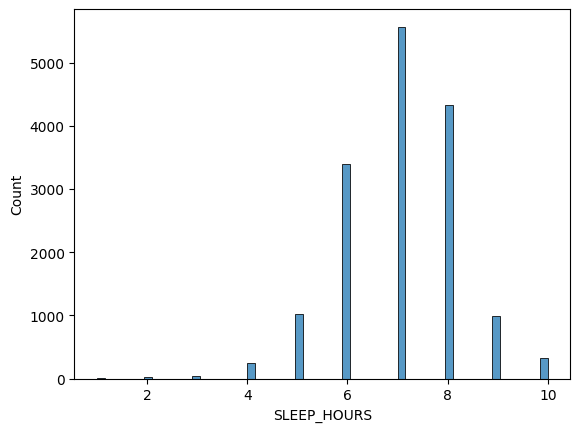

In [23]:
sns.histplot(df['SLEEP_HOURS'])

<AxesSubplot: xlabel='LOST_VACATION', ylabel='Count'>

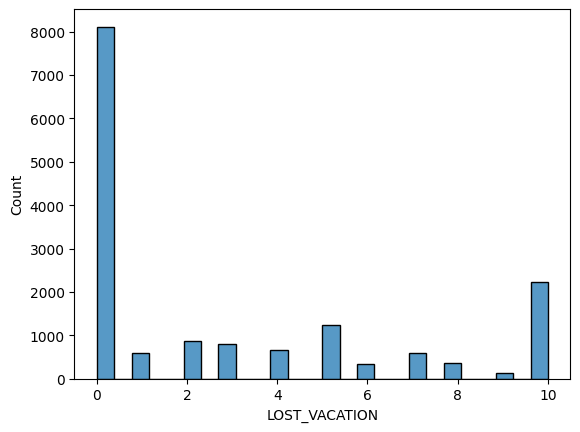

In [24]:
sns.histplot(df['LOST_VACATION'])

<AxesSubplot: xlabel='DAILY_SHOUTING', ylabel='Count'>

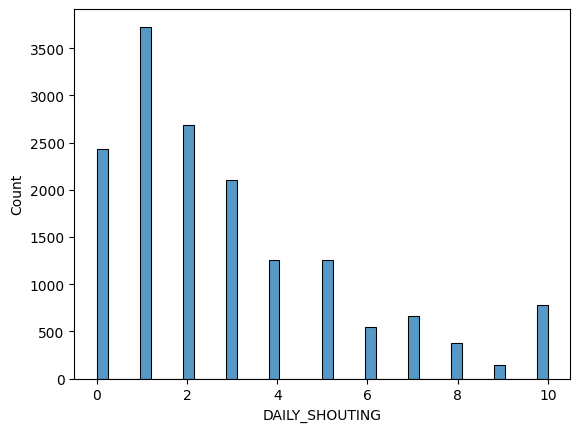

In [25]:
sns.histplot(df['DAILY_SHOUTING'])

<AxesSubplot: xlabel='SUFFICIENT_INCOME', ylabel='Count'>

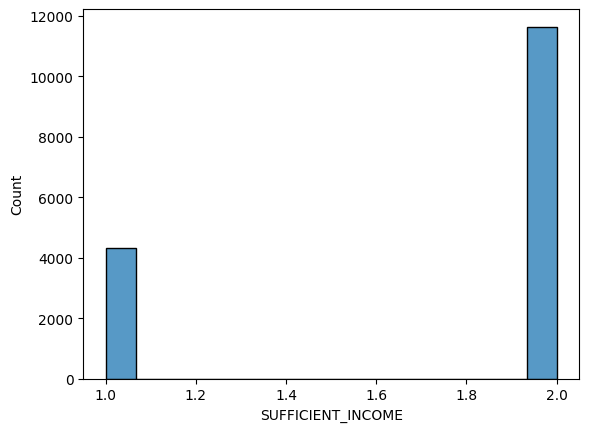

In [26]:
sns.histplot(df['SUFFICIENT_INCOME'])

<AxesSubplot: xlabel='PERSONAL_AWARDS', ylabel='Count'>

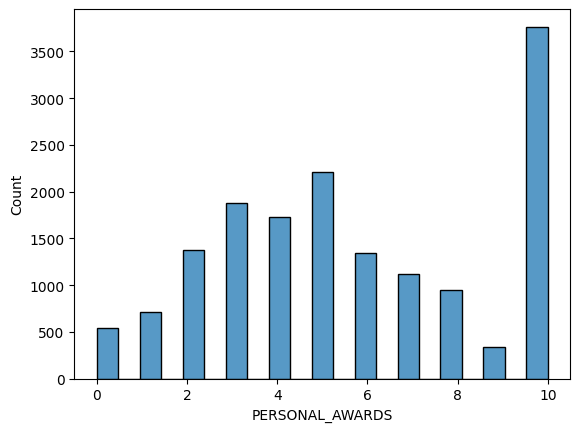

In [27]:
sns.histplot(df['PERSONAL_AWARDS'])

<AxesSubplot: xlabel='TIME_FOR_PASSION', ylabel='Count'>

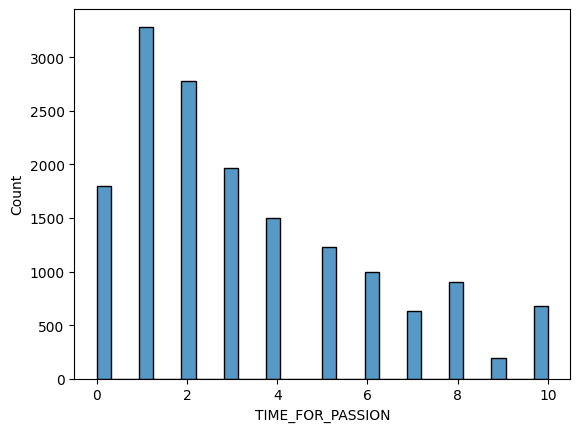

In [28]:
sns.histplot(df['TIME_FOR_PASSION'])

<AxesSubplot: xlabel='WEEKLY_MEDITATION', ylabel='Count'>

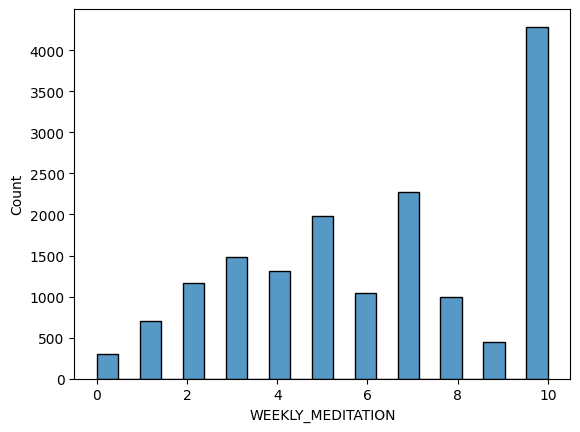

In [29]:
sns.histplot(df['WEEKLY_MEDITATION'])

<AxesSubplot: xlabel='GENDER', ylabel='Count'>

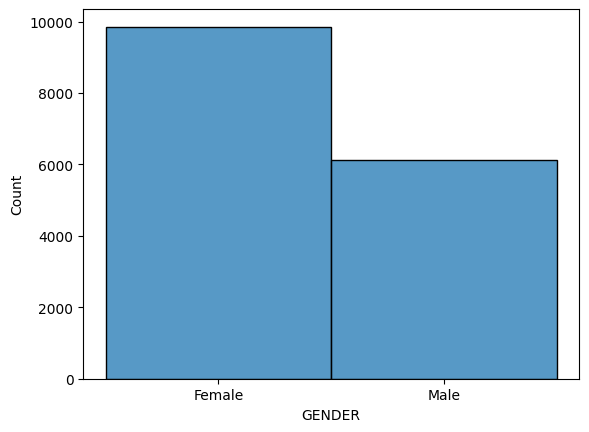

In [30]:
sns.histplot(df['GENDER'])

<AxesSubplot: xlabel='WORK_LIFE_BALANCE_SCORE', ylabel='Count'>

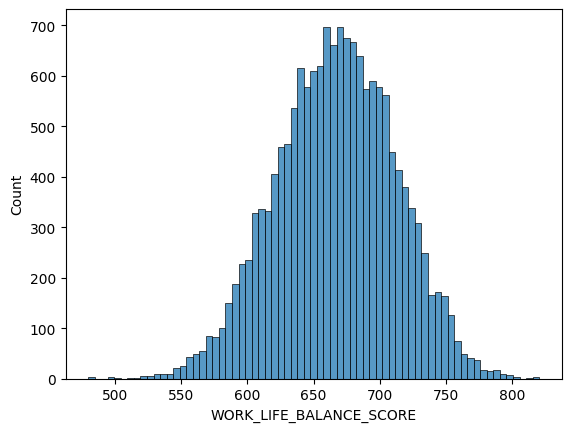

In [31]:
sns.histplot(df['WORK_LIFE_BALANCE_SCORE'])

## CHECKING FOR CORRELATIONS

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['DAILY_STRESS'] = le.fit_transform(df['DAILY_STRESS'])

In [33]:
corr_matrix = df.corr()

In [34]:
corr_matrix["WORK_LIFE_BALANCE_SCORE"].sort_values(ascending=False)

WORK_LIFE_BALANCE_SCORE    1.000000
ACHIEVEMENT                0.561244
SUPPORTING_OTHERS          0.548851
TODO_COMPLETED             0.545503
PLACES_VISITED             0.529615
TIME_FOR_PASSION           0.516967
CORE_CIRCLE                0.507541
PERSONAL_AWARDS            0.504224
FLOW                       0.478199
LIVE_VISION                0.471311
DONATION                   0.458829
FRUITS_VEGGIES             0.452255
DAILY_STEPS                0.422981
WEEKLY_MEDITATION          0.416171
SOCIAL_NETWORK             0.412586
SUFFICIENT_INCOME          0.403561
SLEEP_HOURS                0.196395
BMI_RANGE                 -0.251988
LOST_VACATION             -0.266243
DAILY_SHOUTING            -0.273153
DAILY_STRESS              -0.355166
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

In [35]:
sns.catplot(x = 'WORK_LIFE_BALANCE_SCORE', y = 'DAILY_STRESS', data = df)

In [36]:
X= df.drop(['DAILY_STRESS'], axis=1)
y = df['DAILY_STRESS']

## TRAIN-TEST SPLITTING

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [38]:
X_train.shape, X_test.shape

((11979, 21), (3993, 21))

((11979, 21), (3993, 21))

## FEATURE ENGINEERING

In [39]:
X_train.dtypes

FRUITS_VEGGIES               int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

FRUITS_VEGGIES               int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

In [40]:
!pip install category_encoders==2.6.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 27.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [41]:
import category_encoders as ce

In [42]:
encoder = ce.OrdinalEncoder(cols=['GENDER'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE
7458,3,5,3,3,4,4,5,2,5,3,...,10,5,2,5,2,2,10,5,1,663.5
15550,2,2,5,7,10,4,5,1,6,5,...,10,6,0,2,2,4,6,6,1,708.9
1878,4,3,1,4,5,1,3,1,7,0,...,2,6,2,7,2,2,0,5,2,631.8
10284,5,10,10,10,5,7,5,1,8,6,...,1,8,0,1,2,10,8,10,2,763.5
7831,4,9,6,8,7,7,1,2,8,4,...,8,6,1,2,2,5,8,7,2,695.8


,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE
7458,3,5,3,3,4,4,5,2,5,3,...,10,5,2,5,2,2,10,5,1,663.5
15550,2,2,5,7,10,4,5,1,6,5,...,10,6,0,2,2,4,6,6,1,708.9
1878,4,3,1,4,5,1,3,1,7,0,...,2,6,2,7,2,2,0,5,2,631.8
10284,5,10,10,10,5,7,5,1,8,6,...,1,8,0,1,2,10,8,10,2,763.5
7831,4,9,6,8,7,7,1,2,8,4,...,8,6,1,2,2,5,8,7,2,695.8


## CHECK ACCURACY SCORE USING LOGISTIC REGRESSION

Logistic regression algorithm is used to solve classification problems. 

Here, our target variable is "DAILY_STRESS" which contains value from 0 to 5, indicating the level of stress that a person experiences in his/her daily life.

We have used StandardScaler for standardization of values as the dataset contains variable values that are different in scale. For eg. WORK_LIFE_BALANCE_SCORE with values on a scale of 600-800 and DAILY_STRESS 0-5.

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [45]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9276233408464813
Accuracy :  0.9276233408464813


## CLASSIFICATION REPORT

We have used classification report as the performance evaluation metrics of a classification-based machine leaning model. It displays the model's precision, recall, F1 score and, support.

Precision: the ratio of true positives to the sum of true or false positives.

Recall: the ratio of true positives to the sum of true positives and false negatives.

F1 Score: The F1 is the harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

Support: the number of actual occurrences of the class in the dataset. It doesn't vary between models, it just diagnoses the performance evaluation process.

In [48]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.02      0.03       172
           1       0.78      0.94      0.85       638
           3       0.96      0.97      0.96       854
           4       0.94      1.00      0.97      1105
           5       0.99      0.93      0.96       713
           6       0.99      0.98      0.99       511

    accuracy                           0.93      3993
   macro avg       0.94      0.81      0.79      3993
weighted avg       0.94      0.93      0.91      3993

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.02      0.03       172
           1       0.78      0.94      0.85       638
           3       0.96      0.97      0.96       854
           4       0.94      1.00      0.97      1105
           5       0.99      0.93      0.96       713
           6       0.99      0.98      0.99       511

    accuracy         

In [49]:
def get_classification_report(y_test, y_pred):
    
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

s= get_classification_report(y_test, y_pred)
s

,precision,recall,f1-score,support
6,0.988189,0.982387,0.985280,511.000000
4,0.942784,0.999095,0.970123,1105.000000
3,0.957324,0.971897,0.964555,854.000000
5,0.985163,0.931276,0.957462,713.000000
accuracy,0.927623,0.927623,0.927623,0.927623
weighted avg,0.935810,0.927623,0.909697,3993.000000
1,0.780519,0.942006,0.853693,638.000000
macro avg,0.942330,0.807351,0.794233,3993.000000
0,1.000000,0.017442,0.034286,172.000000


,precision,recall,f1-score,support
6,0.988189,0.982387,0.985280,511.000000
4,0.942784,0.999095,0.970123,1105.000000
3,0.957324,0.971897,0.964555,854.000000
5,0.985163,0.931276,0.957462,713.000000
accuracy,0.927623,0.927623,0.927623,0.927623
weighted avg,0.935810,0.927623,0.909697,3993.000000
1,0.780519,0.942006,0.853693,638.000000
macro avg,0.942330,0.807351,0.794233,3993.000000
0,1.000000,0.017442,0.034286,172.000000


## CONFUSION MATRIX

We implemented confusion matrix to measure the performance of the classifiers in depth by plotting a table of all the predicted and actual values of a classifier.

Text(0.5, 36.72222222222221, 'Predicted Values')

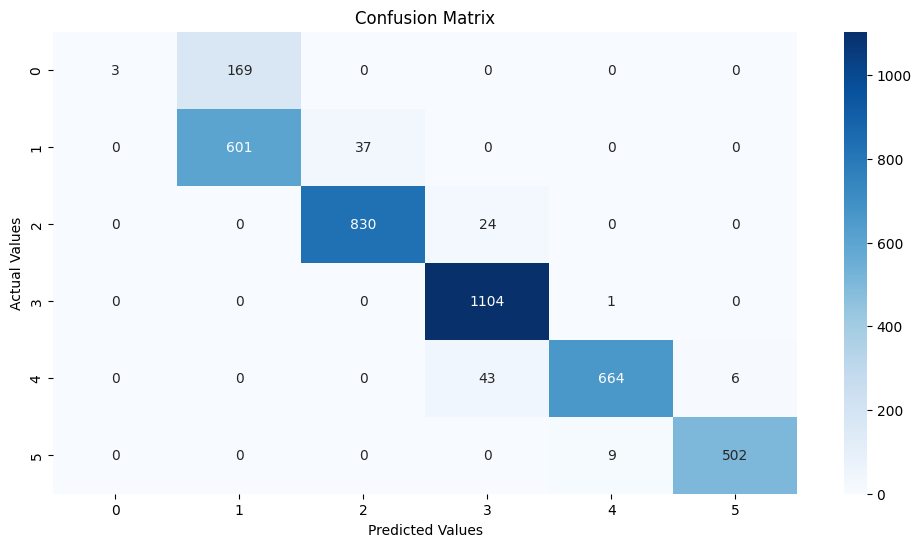

Text(0.5, 36.72222222222221, 'Predicted Values')

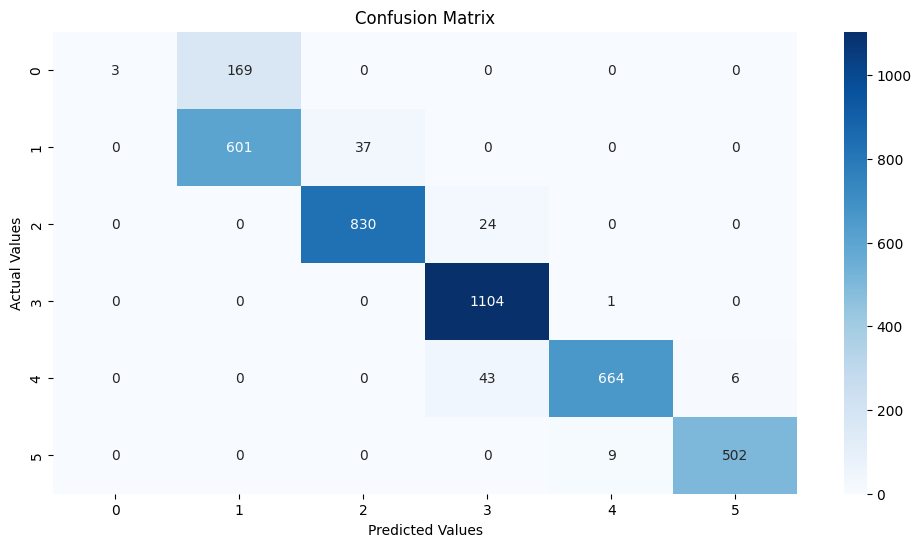

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [51]:
y_pred.dtype

dtype('int64')

dtype('int64')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15972 non-null  int64  
 1   DAILY_STRESS             15972 non-null  int64  
 2   PLACES_VISITED           15972 non-null  int64  
 3   CORE_CIRCLE              15972 non-null  int64  
 4   SUPPORTING_OTHERS        15972 non-null  int64  
 5   SOCIAL_NETWORK           15972 non-null  int64  
 6   ACHIEVEMENT              15972 non-null  int64  
 7   DONATION                 15972 non-null  int64  
 8   BMI_RANGE                15972 non-null  int64  
 9   TODO_COMPLETED           15972 non-null  int64  
 10  FLOW                     15972 non-null  int64  
 11  DAILY_STEPS              15972 non-null  int64  
 12  LIVE_VISION              15972 non-null  int64  
 13  SLEEP_HOURS              15972 non-null  int64  
 14  LOST_VACATION         

In [53]:
import pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(classifier, files)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0941651e-1377-4346-9ad1-27315701bdc3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>